# Dimensionality Reduction using an Autoencoder


## Project Outline
[**Task 1**](#task1): Package importing 

[**Task 2**](#task2): Dataset Creation and Preprocessing

[**Task 3**](#task3): Create a Baseline model with PCA

[**Task 4**](#task4): Autoencoder Training

[**Task 5**](#task5): Reducing Dimensionality with AE


<a id='task1'></a>
# Task 1: Importing packages

In [1]:
import matplotlib
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import numpy as np

In [2]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPRegressor
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

In [3]:
cols = ['#1FC17B', '#78FECF', '#555B6E', '#CC998D', '#429EA6',
        '#153B50', '#8367C7', '#EE6352', '#C287E8', '#F0A6CA', 
        '#521945', '#361F27', '#828489', '#9AD2CB', '#EBD494', 
        '#53599A', '#80DED9', '#EF2D56', '#446DF6', '#AF929D']

<a id='task2'></a>
# TASK 2: Dataset Creation and Preprocessing

In [4]:
X,y = make_blobs(n_features = 50, centers = 20, n_samples = 20000
                , cluster_std = 0.2, center_box = [-1,1], random_state = 17) 

In [5]:
print(X[0])
print(y[0])

[-0.24491985  0.08099673 -0.36631058 -0.30356551  0.4029225   0.65687067
  0.92734294  0.15492068 -1.10501981  1.2015462   0.09578114 -0.75648951
 -0.03483697 -0.59523737  0.02576486  0.53523807  0.08089194 -0.26480015
 -0.71277422  0.07793643  0.10326661 -0.92311803 -0.18569531 -0.5761846
 -0.78765359 -0.83055169  0.04446853 -0.26118528  0.8337965  -0.59227263
  0.68834042  0.17701281  0.2732509  -0.00538731  0.92922794  0.62743183
  0.85424358  0.80721711 -1.14219787  0.28178435  0.55215801  0.38500603
  0.19163107  0.55960783  0.72073584 -1.14520866  1.09184982 -1.04337987
  1.24350139 -0.63786661]
16


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.1, random_state=17)

## Scaling the data 
by converting the existing distribution to have values between 0 and 1

In [7]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [8]:
X_train[2]

array([0.18921322, 0.44519859, 0.36144016, 0.69996545, 0.49242724,
       0.37106629, 0.28594342, 0.17575985, 0.66316724, 0.49256868,
       0.66081079, 0.85326462, 0.45091269, 0.90049673, 0.23438656,
       0.68761967, 0.26178949, 0.20147563, 0.24138265, 0.51887598,
       0.36090425, 0.73181175, 0.58425916, 0.57756296, 0.56495553,
       0.10116072, 0.3450766 , 0.09300849, 0.21392018, 0.71365469,
       0.73408831, 0.70735904, 0.7891174 , 0.37805326, 0.35384827,
       0.81428072, 0.22448256, 0.34902028, 0.37788182, 0.59991932,
       0.67821885, 0.4176171 , 0.71902151, 0.36297674, 0.45916695,
       0.37790379, 0.37869895, 0.27937111, 0.68712346, 0.49049773])

<a id='task3'></a>
# TASK 3: Baseline model

In [9]:
pca = PCA(n_components = 2) 
pca.fit(X_train)

res_pca = pca.transform(X_test)

In [10]:
res_pca.shape

(2000, 2)

Text(0.5, 1.0, 'PCA Results')

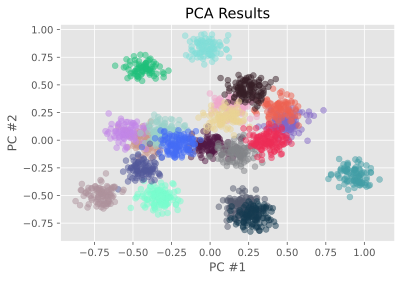

In [11]:
unique_labels = np.unique(y_test)

for index, unique_label in enumerate(unique_labels):
    X_data = res_pca[y_test==unique_label]
    
    plt.scatter(X_data[:,0],X_data[:,1], alpha = 0.5, c=cols[index])
    
plt.xlabel('PC #1')
plt.ylabel('PC #2')
plt.title('PCA Results')

<a id='task4'></a>
# TASK 4 : Autoencoder Training

In [12]:
autoencoder = MLPRegressor(alpha = 1e-15,
                          hidden_layer_sizes = (50,100,50,2,50,100,50),
                          random_state = 1,
                          max_iter=20000)
autoencoder.fit(X_train, X_train)

MLPRegressor(alpha=1e-15, hidden_layer_sizes=(50, 100, 50, 2, 50, 100, 50),
             max_iter=20000, random_state=1)

<a id='task5'></a>
# TASK 5: Dimensional reductionality using Autoencoder

We are only concerned with the first half of our autoencoder, ie, the encoder half. We'll use skilearn library to access that encoder. In the theory of neural network and autoencoder, we have weights(m in the mx +c equation), non-linearity and bias values (intercept in the mx + c equation). So we extract this information using the steps below.

In [13]:
W = autoencoder.coefs_
biases = autoencoder.intercepts_

In [14]:
for w in W:
    print(w.shape)

(50, 50)
(50, 100)
(100, 50)
(50, 2)
(2, 50)
(50, 100)
(100, 50)
(50, 50)


Since we are only looking for the encoder, we'll work with the first four values

In [15]:
encoder_weights = W[0:4]
encoder_biases = biases[0:4]

In [16]:
def encode(encoder_weights, encoder_biases, data):
    res_ae = data
    for index, (w,b) in enumerate(zip(encoder_weights, encoder_biases)):
        if index + 1 == len(encoder_weights):
            res_ae = res_ae@w + b
        else:
            res_ae = np.maximum(0,res_ae@w +b)
    return res_ae
res_ae = encode(encoder_weights, encoder_biases, X_test)

In [17]:
res_ae.shape

(2000, 2)

Text(0.5, 1.0, 'Autoencoder Results')

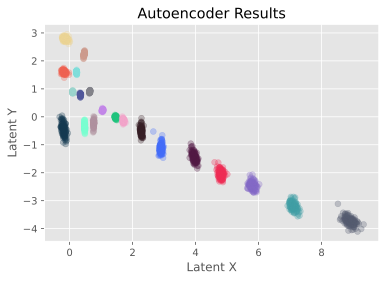

In [18]:
unique_labels = np.unique(y_test)

for index, unique_label in enumerate(unique_labels):
    latent_space = res_ae[y_test == unique_label]
    
    plt.scatter(latent_space[:,0],latent_space[:,1], alpha =0.3, c= cols[index])
    
    
    
plt.xlabel('Latent X')
plt.ylabel('Latent Y')
plt.title('Autoencoder Results')


Clustering algorithms check how well suited the point is to the class/cluster it has been assigned to vs the neighbouring cluster. This is called silhouette score.

In [19]:
silhouette_score(X_test, y_test)

0.6100948647899368

In [20]:
silhouette_score(res_pca, y_test)

0.3678397786452619

In [21]:
silhouette_score(res_ae, y_test)

0.8074659601944325